In [ ]:
import pandas as pd

url1 = 'https://drive.google.com/file/d/1urMC2r2v_QJqkfXsnsihc8j_Cu_NxDjl/view?usp=sharing'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
reviews1 = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/14_rL-UoMJet7-F8zZXtS3V3IzO0arLaT/view?usp=sharing'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
reviews2 = pd.read_csv(path2)


In [ ]:
reviews1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
reviews2.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
reviews2.shape

(23486, 11)

In [ ]:
import re
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS

def clean_review(review, stopwords):
    review=review.lower()
    html_tag = re.compile('<.*?>')
    cleaned_review = re.sub(html_tag, "", review).split()
    cleaned_review = [i for i in cleaned_review if i not in stopwords]
    return " ".join(cleaned_review)

# def clean_review2(review, stopwords):
#     # html_tag = re.compile('<.*?>')
#     # cleaned_review = re.sub(html_tag, "", review).split()
#     review=review.lower()
#     cleaned_review = review.split()
#     cleaned_review = [i for i in cleaned_review if i not in stopwords]
#     return " ".join(cleaned_review)


# text = reviews1.review[89]
# print(text[:200])

# cleaned_text1 = clean_review1(text, stop_words)
# print(cleaned_text1[:200])

## cleaning the review column
reviews1["cleaned_review"] = reviews1["review"].apply(lambda x: clean_review(x, stop_words))
# removing null values present in women clothing
reviews2 = reviews2.dropna()
reviews2["cleaned_review"] = reviews2["Review Text"].apply(lambda x: clean_review(x, stop_words))

In [ ]:
rev1=reviews1[['cleaned_review','sentiment']]

In [ ]:
rev2=reviews2[['cleaned_review','Recommended IND']]

In [ ]:
rev2.rename(columns={'Recommended IND':'recomended'}, inplace=True)

<ipython-input-8-772a510b4bac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev2.rename(columns={'Recommended IND':'recomended'}, inplace=True)


In [ ]:
rev1.head()

,cleaned_review,sentiment
0,reviewers mentioned watching just 1 oz episode...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [ ]:
rev2.head()

,cleaned_review,recomended
2,high hopes dress really wanted work me. initia...,0
3,"love, love, love jumpsuit. it's fun, flirty, f...",1
4,shirt flattering adjustable tie. perfect lengt...,1
5,"love tracy reese dresses, petite. just 5 feet ...",0
6,aded basket hte mintue look like person. (stor...,1


In [ ]:
from keras.preprocessing.text import Tokenizer

max_features = 5000
oov = "OOV"
tokenizer1 = Tokenizer(num_words = max_features, oov_token = oov)
tokenizer2 = Tokenizer(num_words = max_features, oov_token = oov)
tokenizer1.fit_on_texts(rev1["cleaned_review"])
tokenized1 = tokenizer1.texts_to_sequences(rev1["cleaned_review"])
tokenizer2.fit_on_texts(rev2["cleaned_review"])
tokenized2 = tokenizer2.texts_to_sequences(rev2["cleaned_review"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
rev1['sentiment']= le.fit_transform(rev1['sentiment'])

<ipython-input-13-eacbcdaba5bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev1['sentiment']= le.fit_transform(rev1['sentiment'])


In [ ]:
from keras.utils import pad_sequences

max_len = 500
Xtrain1 = pad_sequences(tokenized1,padding='pre', maxlen = max_len)
Xtrain2 = pad_sequences(tokenized2,padding='pre', maxlen = max_len)
print(type(Xtrain2))

<class 'numpy.ndarray'>


In [ ]:
# The tokenizer is fitted on the data and we would have to use the same tokenizer in flask while tokenizing the input data, so we need to save
# the tokenizer using pickle
import pickle

with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(tokenizer1, handle, protocol=pickle.HIGHEST_PROTOCOL)

# tokenizer1.pickle file will be generated in the drive. Download on local machine and then load it as follows:
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle) 
#Then while tokenizing the input data use this loaded tokenizer to tokenize it

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtrain1, rev1['sentiment'], 
                                                    test_size = .2,
                                                    random_state = 14)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(Xtrain2, sentiment_le2, 
#                                                     test_size = .3,
#                                                     random_state = 13)

In [ ]:
## importing
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D

vocab_size = max_features 
embedding_dims = 128
num_epochs = 3


print("Flipkart Review Dataset")

## model
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dims, input_length = max_len))
# CNN
model1.add(Conv1D(128, kernel_size = 4, input_shape = (vocab_size, embedding_dims),
                 activation = "relu"))
model1.add(MaxPooling1D(pool_size = 3))
# bidirectional LSTM
model1.add(Bidirectional(LSTM(64, return_sequences = True)))
# LSTM and droput
model1.add(LSTM(32, recurrent_dropout = 0.4))
model1.add(Dropout(0.2))
# 1 neuron output layer and sigmoid activation (binary 0 or 1)
model1.add(Dense(1, activation = "sigmoid"))
# model summary and layout
model1.summary()

# print("women clothing dataset")
# noutput = len(le2.classes_) 

# ## model
# model2 = Sequential()
# model2.add(Embedding(vocab_size, embedding_dims, input_length = max_len))
# # CNN
# model2.add(Conv1D(128, kernel_size = 4, input_shape = (vocab_size, embedding_dims),
#                  activation = "relu"))
# model2.add(MaxPooling1D(pool_size = 3))
# # bidirectional LSTM
# model2.add(Bidirectional(LSTM(64, return_sequences = True)))
# # LSTM and droput
# model2.add(LSTM(32, recurrent_dropout = 0.4))
# model2.add(Dropout(0.2))
# # 1 neuron output layer and sigmoid activation (binary 0 or 1)
# model2.add(Dense(noutput - 1, activation = "sigmoid"))
# # model summary and layout
# model2.summary()




Flipkart Review Dataset


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 497, 128)          65664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 165, 128)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 165, 128)         98816     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0

In [ ]:
#adam optimizer and binary crossentropy
print("Flipkart Review Dataset")
model1.compile(loss = "binary_crossentropy", metrics = ["accuracy"],optimizer = "adam")

model1.fit(X_train1, y_train1, epochs = num_epochs,
          batch_size = 32,
          validation_data = (X_test1[:1000], y_test1[:1000]),
          verbose = 1)
# print("women clothing dataset")
# model2.compile(loss = "binary_crossentropy", metrics = ["accuracy"],optimizer = "adam")
# model2.fit(X_train2, y_train2, epochs = num_epochs,
#           batch_size = 32,
#           validation_data = (X_test2[:1000], y_test2[:1000]),
#           verbose = 1)


Flipkart Review Dataset
Epoch 1/3
1250/1250 [==============================] - 547s 425ms/step - loss: 0.3420 - accuracy: 0.8498 - val_loss: 0.3215 - val_accuracy: 0.8660
Epoch 2/3
1250/1250 [==============================] - 434s 347ms/step - loss: 0.2349 - accuracy: 0.9083 - val_loss: 0.3033 - val_accuracy: 0.8690
Epoch 3/3
1250/1250 [==============================] - 430s 344ms/step - loss: 0.1657 - accuracy: 0.9400 - val_loss: 0.3463 - val_accuracy: 0.8590


In [ ]:
model1.evaluate(X_test1,y_test1)

313/313 [==============================] - 19s 61ms/step - loss: 0.3191 - accuracy: 0.8753


[0.31914129853248596, 0.8752999901771545]

In [ ]:
pred=model1.predict(X_test1)

313/313 [==============================] - 22s 67ms/step


In [ ]:
pred_test=[]
for i in pred:
  pred_test.append(round(i[0]))

<Axes: >

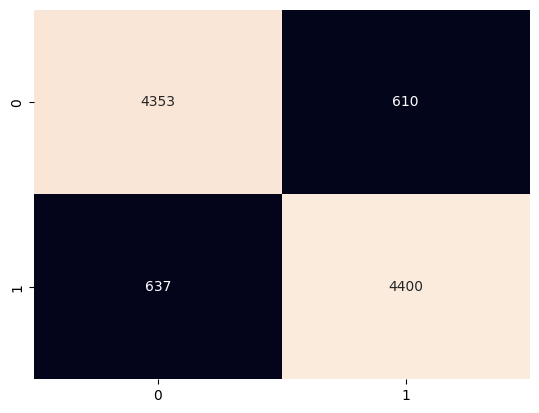

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test1,pred_test)
sns.heatmap(cm,annot=True,fmt="d",cbar=False)

In [ ]:
# Now for a random input taken from random show

ip='So much potential wasted. Great cast (some roles were unfit) , bad script and bad story line.'
cleaned_ip=clean_review(ip,stop_words)

# the same tokenizer fited on the training data is used to tokenize the i/p. Load the tokenizer saved earlier and used similarly
tokenized_ip=tokenizer1.texts_to_sequences([cleaned_ip])
fin=pad_sequences(tokenized_ip,padding='pre', maxlen = max_len)

In [ ]:
# round is used cause sigmoid gives between 0 and 1, if more than 0.5 belongs to class 1, else class 0
ans=model1.predict(fin)
print(round(ans[0][0]))

1/1 [==============================] - 0s 267ms/step
0


In [ ]:
model2.save('/content/drive/MyDrive/Misc/SentimentAnalysis/cloth_model')